## Imports

In [4]:
import ipywidgets as widgets
from IPython.display import display
import cv2
import io
import boto3
from matplotlib import pyplot as plt

## Display Annotation Toggle and Flow with it

In [5]:
tog = widgets.ToggleButtons(options=['Obstacle', 'No Obstacle', 'Static', 'Removed'])
output = widgets.Output()
display(tog, output)

def annotate(change):
    with output:
        print(change['new'])
        
tog.observe(annotate, names='value')

ToggleButtons(options=('Obstacle', 'No Obstacle', 'Static', 'Removed'), value='Obstacle')

Output()

## Download an image by name from s3

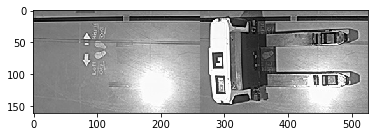

In [6]:
client = boto3.client("s3")
bucket='obstacles-classification'
key= 'new_factory/obstacle/obs_106_1247.jpg'
outfile = io.BytesIO()
client.download_fileobj(bucket, key, outfile)
outfile.seek(0)
im = plt.imread(outfile, format='jpg')
plt.imshow(im, cmap='gray', vmin=0, vmax=255)
plt.show()

## Make a list of all Datasets

In [26]:
client = boto3.client('s3')
bucket='obstacles-classification'
datasets = []

for prefix in client.list_objects(Bucket=bucket, Delimiter='/')['CommonPrefixes']:
    datasets.append(prefix['Prefix'][:-1])
    
print(datasets)

['generic_israel_japan_dataset', 'japan_site_2', 'japan_site_dataset', 'new_factory', 'test_dataset_1', 'test_dataset_3', 'test_dataset_4']


## Make a list of all images in a chosen dataset

In [38]:
dataset = 'test_dataset_4/'
images = []

for image in client.list_objects(Bucket=bucket, Prefix=dataset)['Contents']:
    images.append(image['Key'])
    
print(f'no. of images: {len(images)}')
print()
print(images)

no. of images: 33

['test_dataset_4/no_obstacle/no_obs_2021-05-26--18-30-52_9154570376_0.jpg', 'test_dataset_4/no_obstacle/no_obs_2021-05-26--18-30-52_9154570376_1.jpg', 'test_dataset_4/no_obstacle/no_obs_2021-05-26--18-30-52_9154570376_2.jpg', 'test_dataset_4/no_obstacle/no_obs_2021-05-26--18-30-52_9154570376_3.jpg', 'test_dataset_4/no_obstacle/no_obs_2021-05-26--18-30-52_9154570376_4.jpg', 'test_dataset_4/no_obstacle/no_obs_2021-05-26--18-30-52_9154570376_5.jpg', 'test_dataset_4/obstacle/obs_2021-05-26--18-30-52_9154570376_0.jpg', 'test_dataset_4/obstacle/obs_2021-05-26--18-30-52_9154570376_1.jpg', 'test_dataset_4/obstacle/obs_2021-05-26--18-30-52_9154570376_2.jpg', 'test_dataset_4/obstacle/obs_2021-05-26--18-30-52_9154570376_3.jpg', 'test_dataset_4/obstacle/obs_2021-05-26--18-30-52_9154570376_4.jpg', 'test_dataset_4/obstacle/obs_2021-05-26--18-30-52_9154570376_5.jpg', 'test_dataset_4/obstacle/obs_2021-05-26--18-31-02_9154570376_0.jpg', 'test_dataset_4/obstacle/obs_2021-05-26--18-31-

## Prev and Next buttons

In [37]:
prev_next = widgets.ToggleButtons(options=['< Prev', 'Next >'])
output = widgets.Output()
display(prev_next, output)

def navigate(change):
    with output:
        print(change['new'])
        
prev_next.observe(navigate, names='value')

ToggleButtons(options=('< Prev', 'Next >'), value='< Prev')

Output()

## Image Widget

In [61]:
im = widgets.Image()
display(im)

Image(value=b'')

In [62]:
client = boto3.client("s3")
bucket='obstacles-classification'
key= 'new_factory/obstacle/obs_106_1247.jpg'
outfile = io.BytesIO()
client.download_fileobj(bucket, key, outfile)
outfile.seek(0)
bytes_data = outfile.read()

In [63]:
im.value = bytes_data

In [44]:
file = open('../obstacles_classification_datasets/test_dataset_3/obstacle/obs_1_462.jpg', 'rb')
image = file.read()
widgets.Image(value=image)

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x0…